# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [7]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=6328e8d868f8d9d3d5030ab5da030ebab45b43b4a4dc53137ea08884a4649f09
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3


In [12]:
# !pip install livelossplot==0.5.4
# !pip install pytest==7.1.1
# !pip install ipywidgets==7.6.5
!pip install --upgrade torch torchvision  

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 887.5 MB 7.2 kB/s  eta 0:00:01
     |████████████████████████████████| 24.2 MB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 557.1 MB 8.7 kB/s  eta 0:00:01    |███▊                            | 64.4 MB 8.1 MB/s eta 0:01:01
     |████████████████████████████████| 849 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 317.1 MB 26 kB/s s eta 0:00:01     |███████████████████████▏        | 229.3 MB 8.0 MB/s eta 0:00:12
ERROR: torchtext 0.12.0 has requirement torch==1.11.0, but you'll have torch 1.13.1 which is incompatible.


In [1]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU available
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [12]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 29.83s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [3]:
batch_size = 32  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 20  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

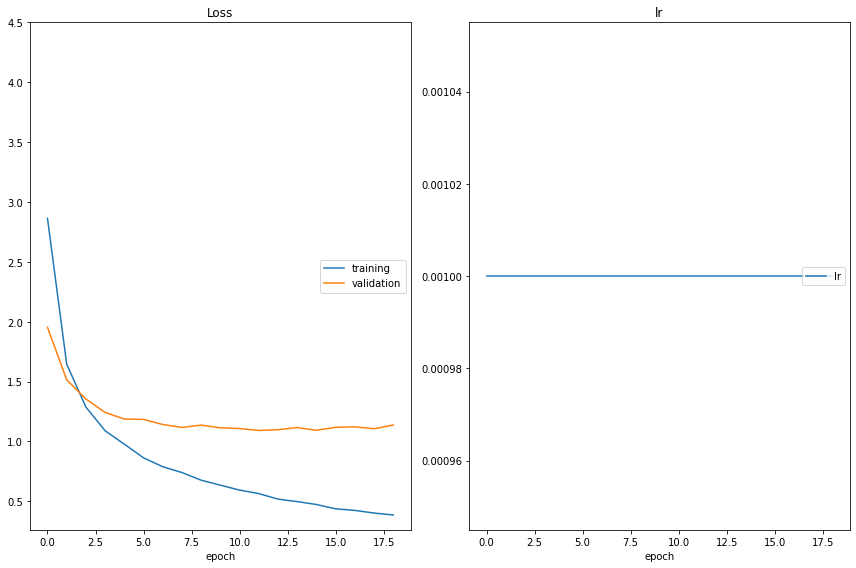

Training:  52%|████████████████▋               | 65/125 [00:55<00:49,  1.21it/s]

In [ ]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="resnet18", n_classes=50)# YOUR CODE HERE

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True
)

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

<img src="static_images/icons/noun-answer-3361020.png" alt=">" style="width:25px"/>  __Answer:__ I decided to use ResNet18 for the base of my model, since it performs fairly well on ImageNet and is not too large of a model. Also, since ResNet18 was trained for the ImageNet task, it is a good model to use for this landmark classificaiton task, since both ImageNet and this landmark task use images of natural scenes.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [8]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning
from src.optimization import get_loss
from src.data import get_data_loaders

data_loaders = get_data_loaders(batch_size=batch_size)
loss = get_loss()

model_transfer = get_model_transfer_learning("resnet18", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

/data/DLND/C2/landmark_images
Reusing cached mean and std
Dataset mean: tensor([0.4638, 0.4725, 0.4687]), std: tensor([0.2699, 0.2706, 0.3018])


Testing: 100%|██████████████████████████████████| 40/40 [00:21<00:00,  1.89it/s]

Test Loss: 1.038366


Test Accuracy: 72% (907/1250)


1.0383662484586238

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [17]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

Reusing cached mean and std


In [20]:
# Export using torch.jit.script
# scripted_predictor = torch.jit.script(predictor)
# scripted_predictor.save("checkpoints/transfer_exported.pt")

100%|███████████████████████████████████████| 1250/1250 [34:18<00:00,  1.65s/it]


Accuracy: 0.7224


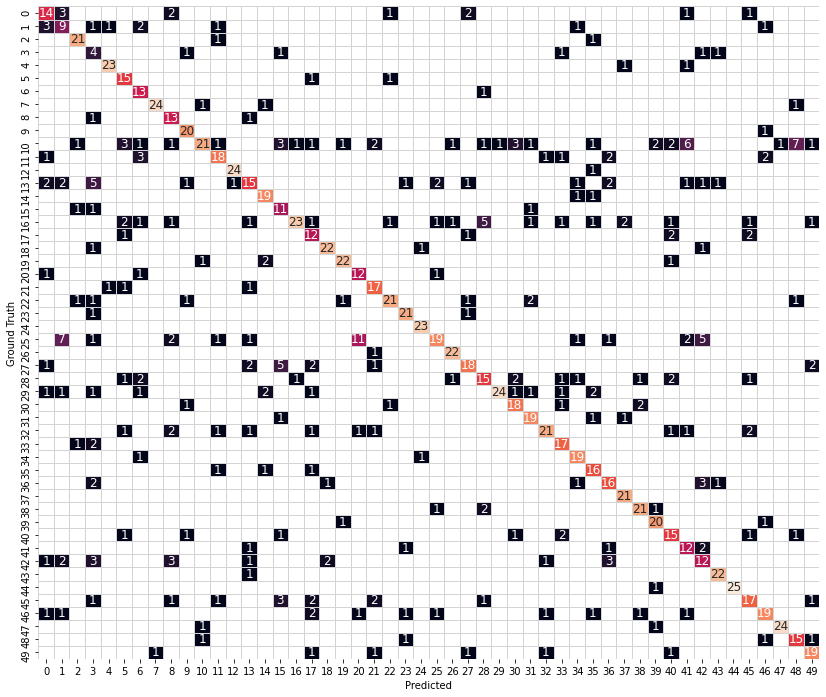

In [26]:
import torch, os
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix, get_data_location
import numpy as np

def predictor_test(test_dataloader, predictor):
    """
    Test the predictor. Since the predictor does not operate on the same tensors
    as the non-wrapped model, we need a specific test function (can't use one_epoch_test)
    """
    
    folder = get_data_location()
    test_data = datasets.ImageFolder(os.path.join(folder, "test"), transform=T.ToTensor())

    pred = []
    truth = []
    for x in tqdm(test_data, total=len(test_dataloader.dataset), leave=True, ncols=80):
        softmax = predictor(x[0].unsqueeze(dim=0))

        idx = softmax.squeeze().argmax()

        pred.append(int(x[1]))
        truth.append(int(idx))

    pred = np.array(pred)
    truth = np.array(truth)

    print(f"Accuracy: {(pred==truth).sum() / pred.shape[0]}")

    return truth, pred

# Use the 'predictor' object instead of 'model_reloaded'
truth, pred = predictor_test(data_loaders['test'], predictor)

plot_confusion_matrix(pred, truth)


In [25]:
# model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")
# pred, truth = predictor_test(data_loaders['test'], model_reloaded)

# plot_confusion_matrix(pred, truth)